In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# feature scaling
from sklearn.preprocessing import StandardScaler


#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap

In [196]:
data= pd.read_csv("Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [193]:
x= data.iloc[:,[2,3]].values
y=data.iloc[:,4].values


In [194]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

In [195]:
# feature scaling

scaler= StandardScaler()

x_train=scaler.fit_transform(x_train)

x_test=scaler.fit_transform(x_test)


In [190]:
# CLASSIFIER

classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)



C:\Users\AnuragMishra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [187]:
y_pred= classifier.predict(x_test)

In [188]:
#Creating the Confusion matrix  

cm= confusion_matrix(y_test,y_pred)
cm                                     # 63+25=88 correct 7+5=12 wrong prediction

array([[63,  5],
       [ 7, 25]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


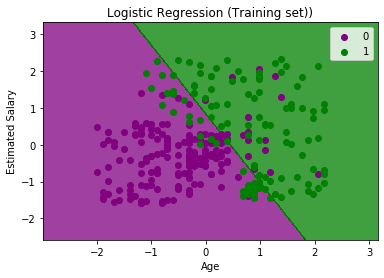

In [170]:
#Visualizing the training set result  

x_set,y_set= x_train,y_train
x1,x2= np.meshgrid(np.arange(start=x_set[:,0].min() -1,stop= x_set[:,0].max()+1,step= 0.01),
                   np.arange(start=x_set[:,1].min() -1,stop= x_set[:,1].max()+1,step= 0.01))

plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))          


plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  

for  i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
    
plt.title('Logistic Regression (Training set))')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


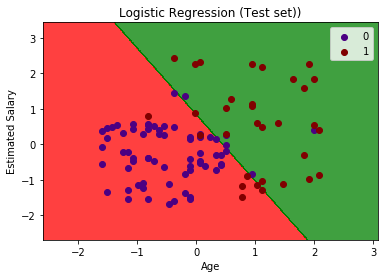

In [198]:
#Visulaizing the test set result  

x_set,y_set= x_test,y_test
x1,x2= np.meshgrid(np.arange(start=x_set[:,0].min() -1,stop= x_set[:,0].max()+1,step= 0.01),
                   np.arange(start=x_set[:,1].min() -1,stop= x_set[:,1].max()+1,step= 0.01))

plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))          


plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  

for  i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('indigo', 'maroon'))(i), label = j)  
    
plt.title('Logistic Regression (Test set))')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  
